## Wind Speed and Green Energy Stock Correlation Analysis

<p style="color:gray;"><i>Built in July, 2024.</i></p>

The wind and its fluctuations can have great significance to amount of energy produced by wind farms. This notebook focuses on analyzing whether wind speed is correlated with the stock price of 'Enefit Green', a company focused on green energy, listed in Talin stock exchange under ticker EGR1T. 

Enefit Green owns wind farms located on the East side of Baltic Sea in Lithuania and Estonia. This notebook takes into account historical wind speeds and compares them with historical price of the stock. The data on the company's stock price is available from 2021-10, so this is the period this notebook focuses on.

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# Getting historical data for the meteorological stations located on the East shore of the Baltic Sea
# For more information on how the data was obtained and processed refer to 'data_gathering.ipynb'
stations = ['KLAIPEDA', 'VIRTSU', 'PALANGA INTL', 'SORVE', 'VILSANDI']

dataframes = {}

for station_name in stations:
    file_path = f'data/{station_name}.nc'
    dataset = xr.open_dataset(file_path)

    df = pd.DataFrame()
    df['windspeeds'] = dataset['windspeeds'].to_dataframe()
    df = df.reset_index()
    df.loc[df['windspeeds'] < 0, 'windspeeds'] = 0
    dataframes[station_name] = df[df['time'] >= '2020-10-21'].reset_index(drop=True)
    dataframes[station_name] = dataframes[station_name].set_index('time')

In [3]:
# Creating dataframe with windspeeds from all stations
df = pd.DataFrame()

for station_name in stations:
    df[station_name] = dataframes[station_name]['windspeeds']

df['average'] = df.mean(axis=1)

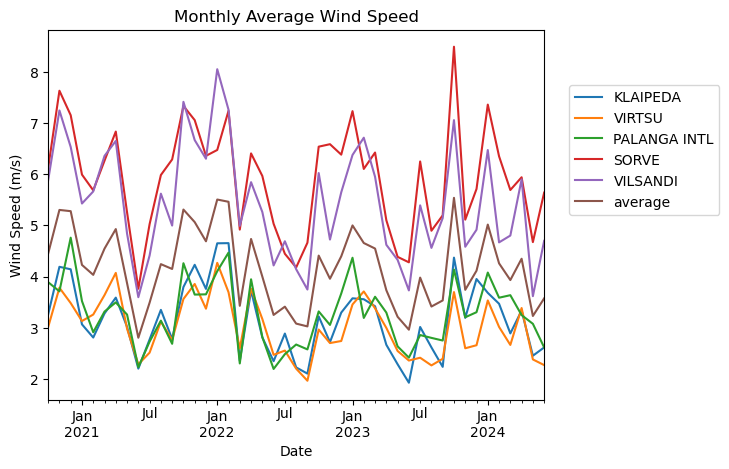

In [4]:
monthly_avg = df.resample('ME').mean()
monthly_avg.plot()

plt.title('Monthly Average Wind Speed')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.legend(loc=(1.05, 0.5))

Wind speed data was obtained, now focusing on stock price

In [5]:
# Loading historical price data for EGR1T
price_df = pd.read_csv('data/EGR1T_historical_price.csv')
price_df['date'] = pd.to_datetime(price_df['date'])
price_df.set_index('date', inplace=True)

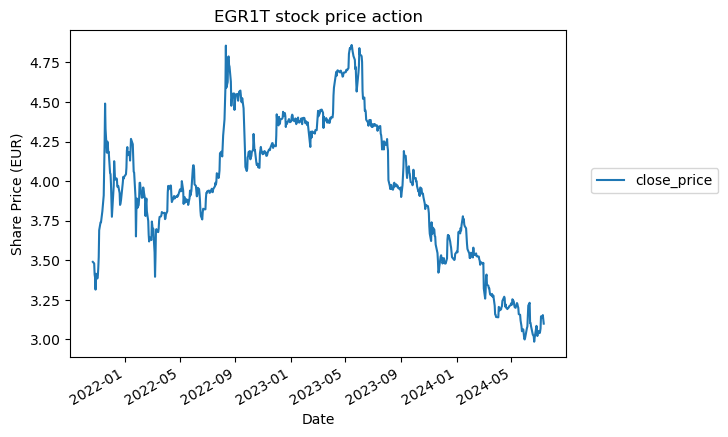

In [6]:
price_df['close_price'].plot()

plt.title('EGR1T stock price action')
plt.xlabel('Date')
plt.ylabel('Share Price (EUR)')
plt.legend(loc=(1.05, 0.5))

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

##### Looking for correlation between wind speed and stock price

In [7]:
# Aligning the two dataframes, and calculating the DAILY correlation between the two
common_dates = price_df.index.intersection(df.index)
price_df_aligned = price_df.loc[common_dates]
wind_df_aligned = df.loc[common_dates]

correlation = price_df_aligned['close_price'].corr(wind_df_aligned['average'])

print(f"Daily correlation: {correlation}")

Daily correlation: -0.06027704618920292


Daily correlation is negligible and creates no obvious use cases. However it is important to also look at longer periods of increased/decreased winds in the region as it could also affect the stock price. That said, the below code focuses on calculating the correlation between monthly price change of the stock price and average wind speed in that month.

In [8]:
# Calculating correlation between monthly average wind speed and monthly price change
price_df_monthly_aligned = price_df.resample('ME').mean(numeric_only=True)
wind_df_monthly_aligned = df.resample('ME').mean(numeric_only=True)

price_df_monthly_aligned['price_change'] = price_df_monthly_aligned['close_price'].diff()

common_dates = price_df_monthly_aligned.index.intersection(wind_df_monthly_aligned.index)
df_price_monthly_aligned = price_df_monthly_aligned.loc[common_dates]
df_other_monthly_aligned = price_df_monthly_aligned.loc[common_dates]

correlation = price_df_monthly_aligned['price_change'].corr(wind_df_monthly_aligned['average'])

print(f"Monthly Correlation: {correlation}")

Monthly Correlation: 0.10455707019455622


Monthly correlation is slightly larger than daily one, although still very small.

The period size is very small (less than 3 years) and from the obtained correlations it is not possible to create any trading strategy which would benefit from it. 

Correlation between the analyzed data could increase in the future, and if that happens it could reach a point where by knowing upcoming weather forecasts traders could go long/short the stock and make profits.